# Правила назначения лекарств

Задание: в больницу поступило пять видов лекарств, однако инструкции к ним потерялись. Имеется лишь история назначения этих лекарств пациентам. Ваша задача - восстановить правила назначения лекарств по известным признакам.

In [24]:
import numpy as np
import pandas as pd
from scipy import stats
import pingouin as pg
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('drug200.csv',header=0)
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Описание признаков:
* Age - возраст пациента; 
* Sex - пол пациента;
* BP - кровяное давление (HIGH - высокое, NORMAL - в пределах нормы, LOW - низкое);
* Cholesterol - содержание холестерина в крови (HIGH - повышенное, NORMAL - нормальное);
* Na_to_K - отношение натрия к калию;
* Drug - назначенное лекарство.

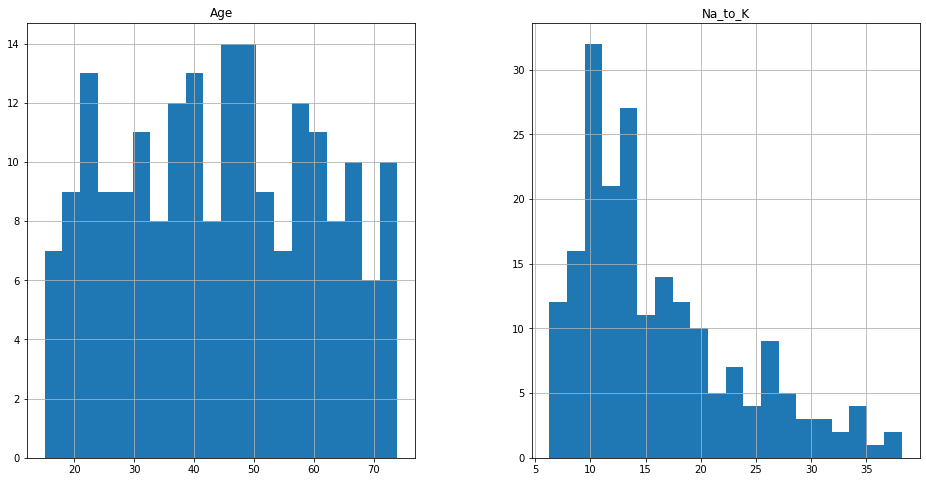

In [28]:
data.hist(figsize=(16,8),bins=20)
plt.show()

Посмотрим влияют ли (и как) категориальные признаки на назначение лекарства.

In [13]:
chi2, pval = stats.chi2_contingency(pd.crosstab(data['Sex'],data['Drug']))[:2]
print('Print pvalue for chi2 test: ',pval)

Print pvalue for chi2 test:  0.7138369773987128


Пол пациента не влияет на тип назначемого лекарства.

In [21]:
bp_crosstab = pd.crosstab(data['BP'],data['Drug'])
chi2, pval = stats.chi2_contingency(bp_crosstab)[:2]
print('Print pvalue for chi2 test: ',pval)
bp_crosstab

Print pvalue for chi2 test:  5.041733414466518e-27


Drug,drugA,drugB,drugC,drugX,drugY
BP,,,,,
HIGH,23,16,0,0,38
LOW,0,0,16,18,30
NORMAL,0,0,0,36,23


Из таблицы видно, что лекарства А и В назначаются пациентам с повышенным давлением, лекарство С - с нормальным, Х - с нормальным и пониженным, назначение Y не зависит от давления.

In [23]:
chol_crosstab = pd.crosstab(data['Cholesterol'],data['Drug'])
chi2, pval = stats.chi2_contingency(chol_crosstab)[:2]
print('Print pvalue for chi2 test: ',pval)
chol_crosstab

Print pvalue for chi2 test:  0.0005962588389856516


Drug,drugA,drugB,drugC,drugX,drugY
Cholesterol,,,,,
HIGH,12,8,16,20,47
NORMAL,11,8,0,34,44


Лекарство С назначется пациентам с повышенным содержанием холестерина в крови, остальные не зависит от этого показателя

In [51]:
pg.anova(data=data,dv='Age',between='Drug')

,Source,ddof1,ddof2,F,p-unc,np2
0,Drug,4,195,7.210544,0.00002,0.128851


In [50]:
stats.kruskal(data[data.Drug=='drugA'].Na_to_K,data[data.Drug=='drugB'].Na_to_K,data[data.Drug=='drugC'].Na_to_K,
              data[data.Drug=='drugX'].Na_to_K,data[data.Drug=='drugY'].Na_to_K)

KruskalResult(statistic=148.65809838778824, pvalue=3.946994995681044e-31)

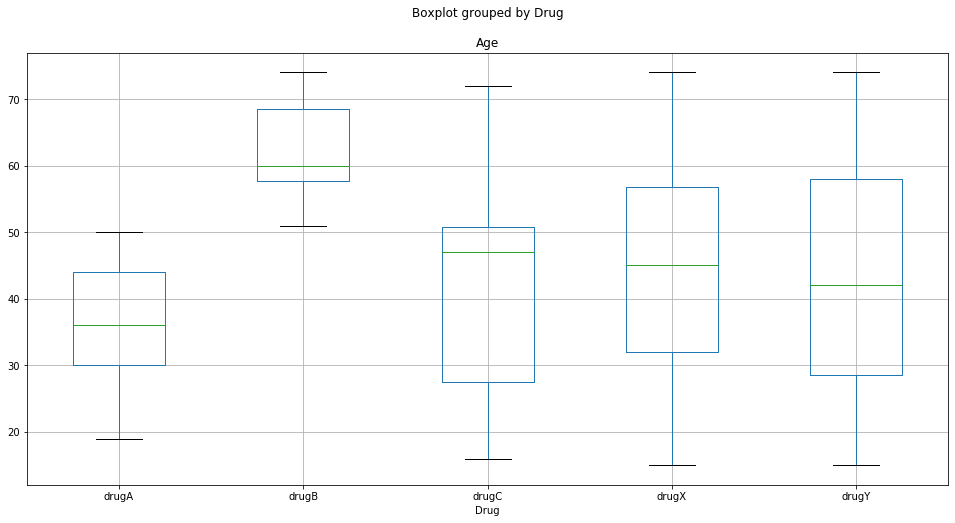

In [53]:
data.boxplot('Age',by='Drug',figsize=(16,8))
plt.show()

Из распределния видно, что лекарство А назначают только пациентам в возрасте до 50 лет, а лекарство В - наоборот, пациентам старше 50.

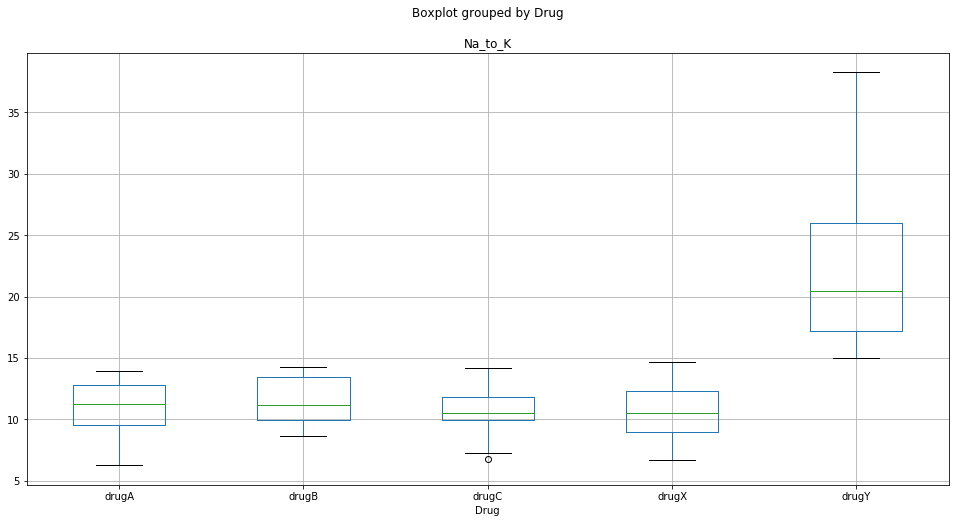

In [54]:
data.boxplot('Na_to_K',by='Drug',figsize=(16,8))
plt.show()

Лекарство Y назначается тем, у кого отношение содержания натрия к калию более 15.

В результате были получены следующие правила назначения лекарств:

In [63]:
rules = pd.DataFrame({'sex':['Any','Any','Any','Any','Any'],'age':['Below 50','Over 50','Any','Any','Any'],
                      'BP':['High','High','Low','Normal & Low','Any'],'Cholesterol':['Any','Any','High','Any','Any'],
                      'Na to K':['<15','<15','<15','<15','>15']})
rules.index = ['drugA','drugB','drugC','drugX','drugY']

In [64]:
rules.head()

,sex,age,BP,Cholesterol,Na to K
drugA,Any,Below 50,High,Any,<15
drugB,Any,Over 50,High,Any,<15
drugC,Any,Any,Low,High,<15
drugX,Any,Any,Normal & Low,Any,<15
drugY,Any,Any,Any,Any,>15
